In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [4]:
# Get only the cubes that have our line of interest in them
mol_tag = 45003
cubes, tbl = fetch_cubes(cubefns, catalog='JPL', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=9>
   FREQ      ERR    LGINT    DR    ELO     GUP   TAG  QNFMT   QN'      QN"   
   MHz       MHz   MHz nm2        1 / cm                                     
 float64   float64 float64 int64 float64  int64 int64 int64   str8     str8  
---------- ------- ------- ----- -------- ----- ----- ----- -------- --------
86370.1169   0.405 -6.7348     3 172.7806    43 45003   304 21 21921 22 12222
86372.5539   0.405  -6.715     3 172.7806    45 45003   304 21 21922 22 12223
86372.6652   0.405 -6.7545     3 172.7806    41 45003   304 21 21920 22 12221
86381.9539  0.0402 -5.1707     3  19.6878    15 45003   304  7 1 6 7  7 0 7 7
86383.2489  0.0401 -5.1075     3  19.6878    17 45003   304  7 1 6 8  7 0 7 8
86383.4356  0.0401 -5.2261     3  19.6878    13 45003   304  7 1 6 6  7 0 7 6
87292.7721  0.8592 -5.4259     3 249.0637    51 45003   304 25 32225 25 32325
87293.6261  0.8592 -5.4085     3 249.0637    53 45003   304 25 32226 25 32326
87293.6603  0.8592 -5.4427     3 249.0637    4

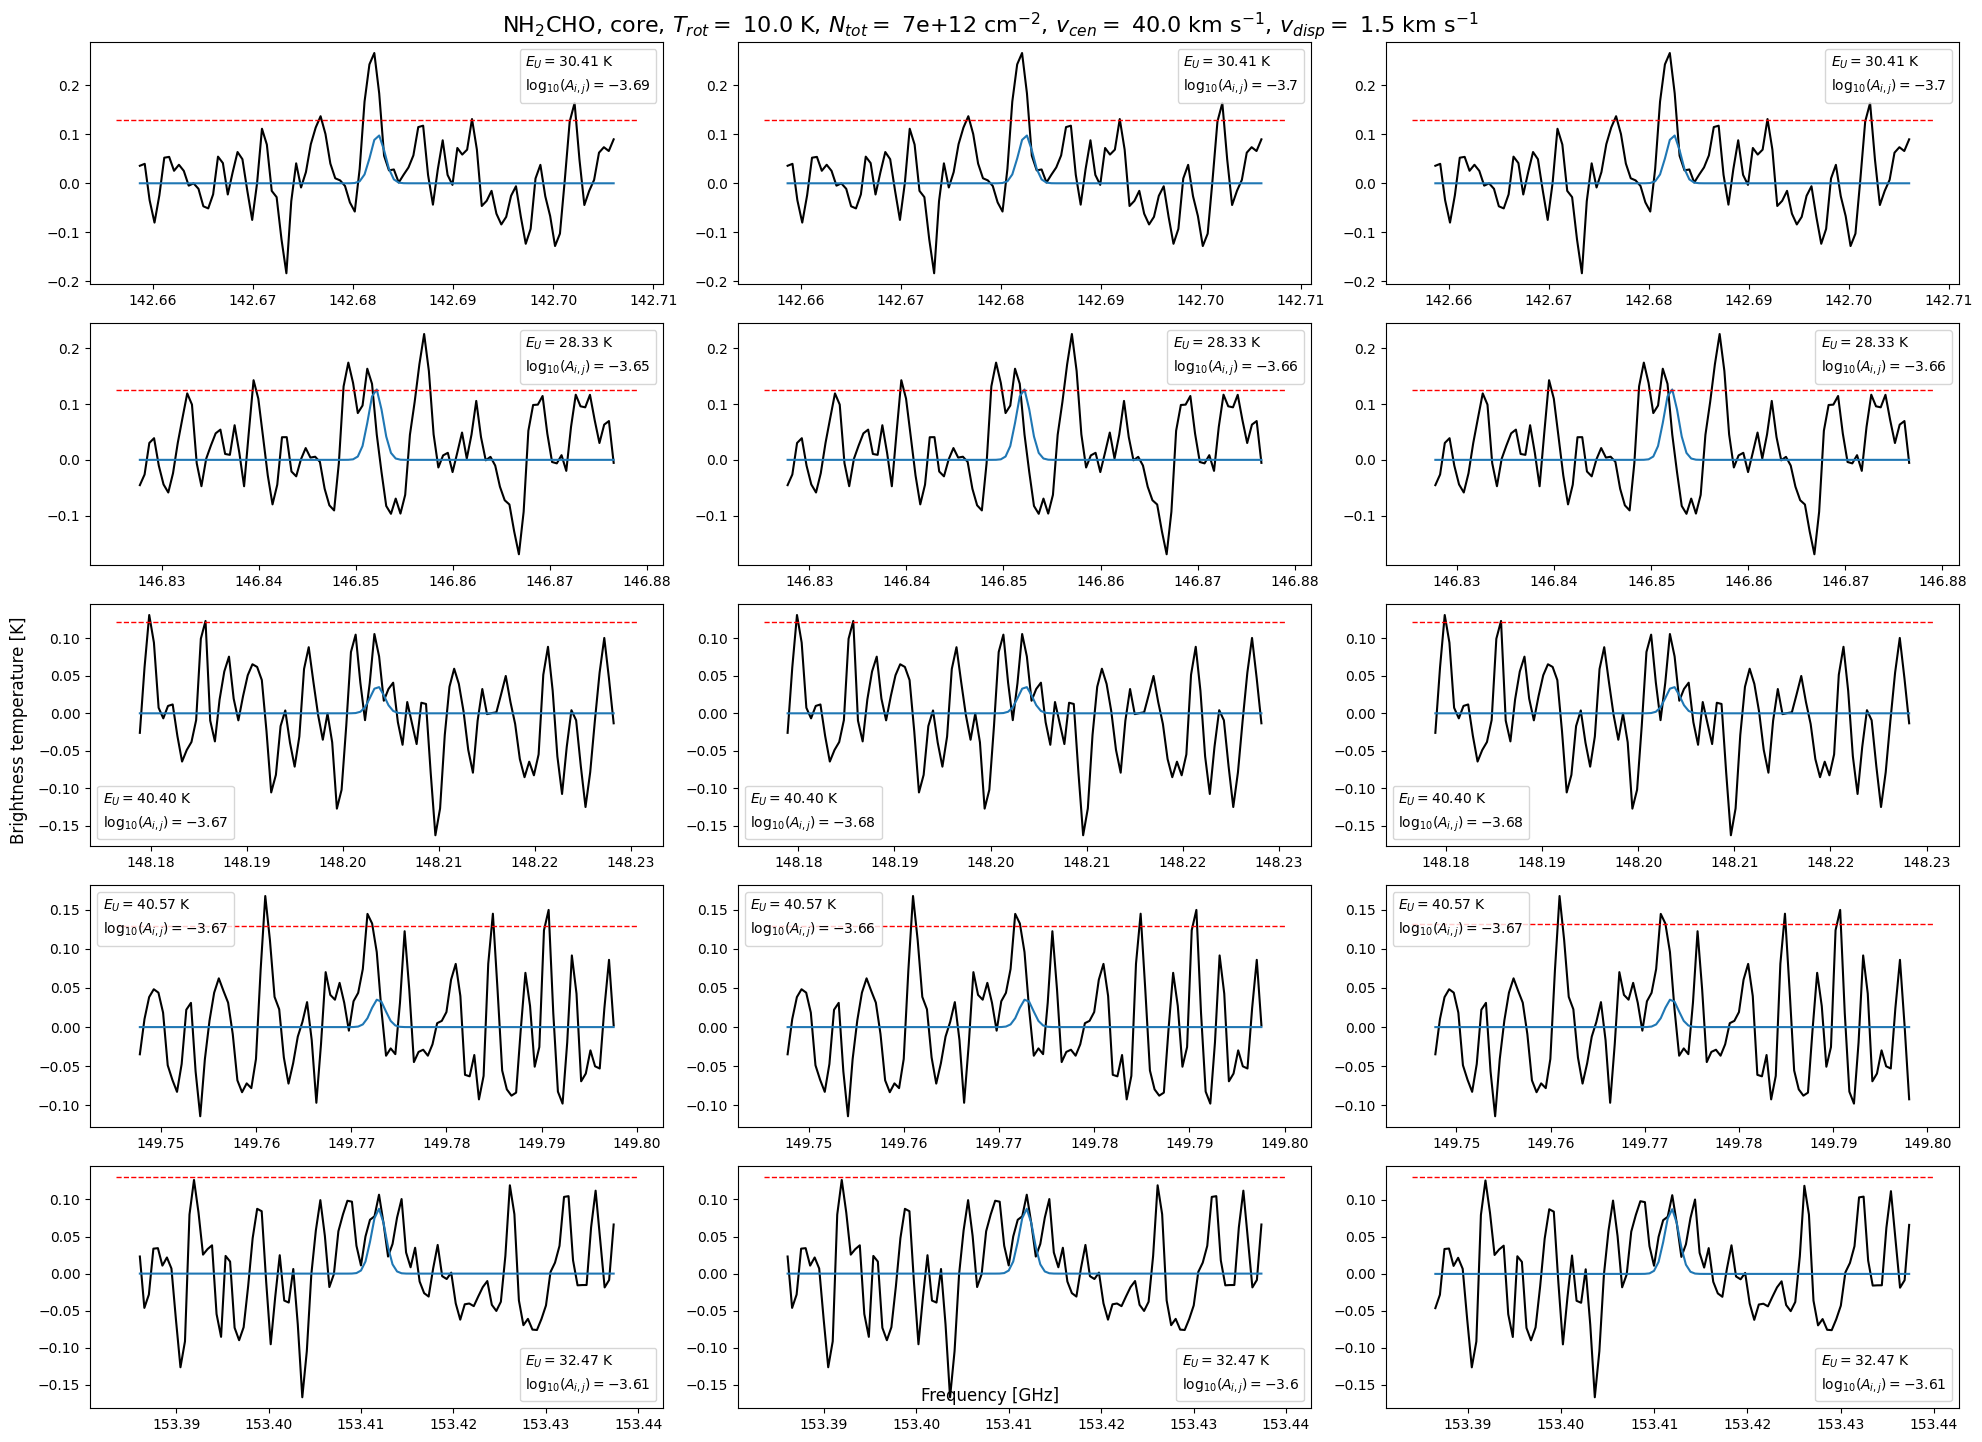

In [5]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 10., N_tot = 7.0e+12, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=15, 
               nrows=5, ncols=3, parse_loc=False, line_by_line=True, name_for_plot=f'NH$_2$CHO', extr_type="coord", crd=crd,
               EU_cutoff_K=50, aij_cutoff=-3.8, show_2_sigma=True)

In [6]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

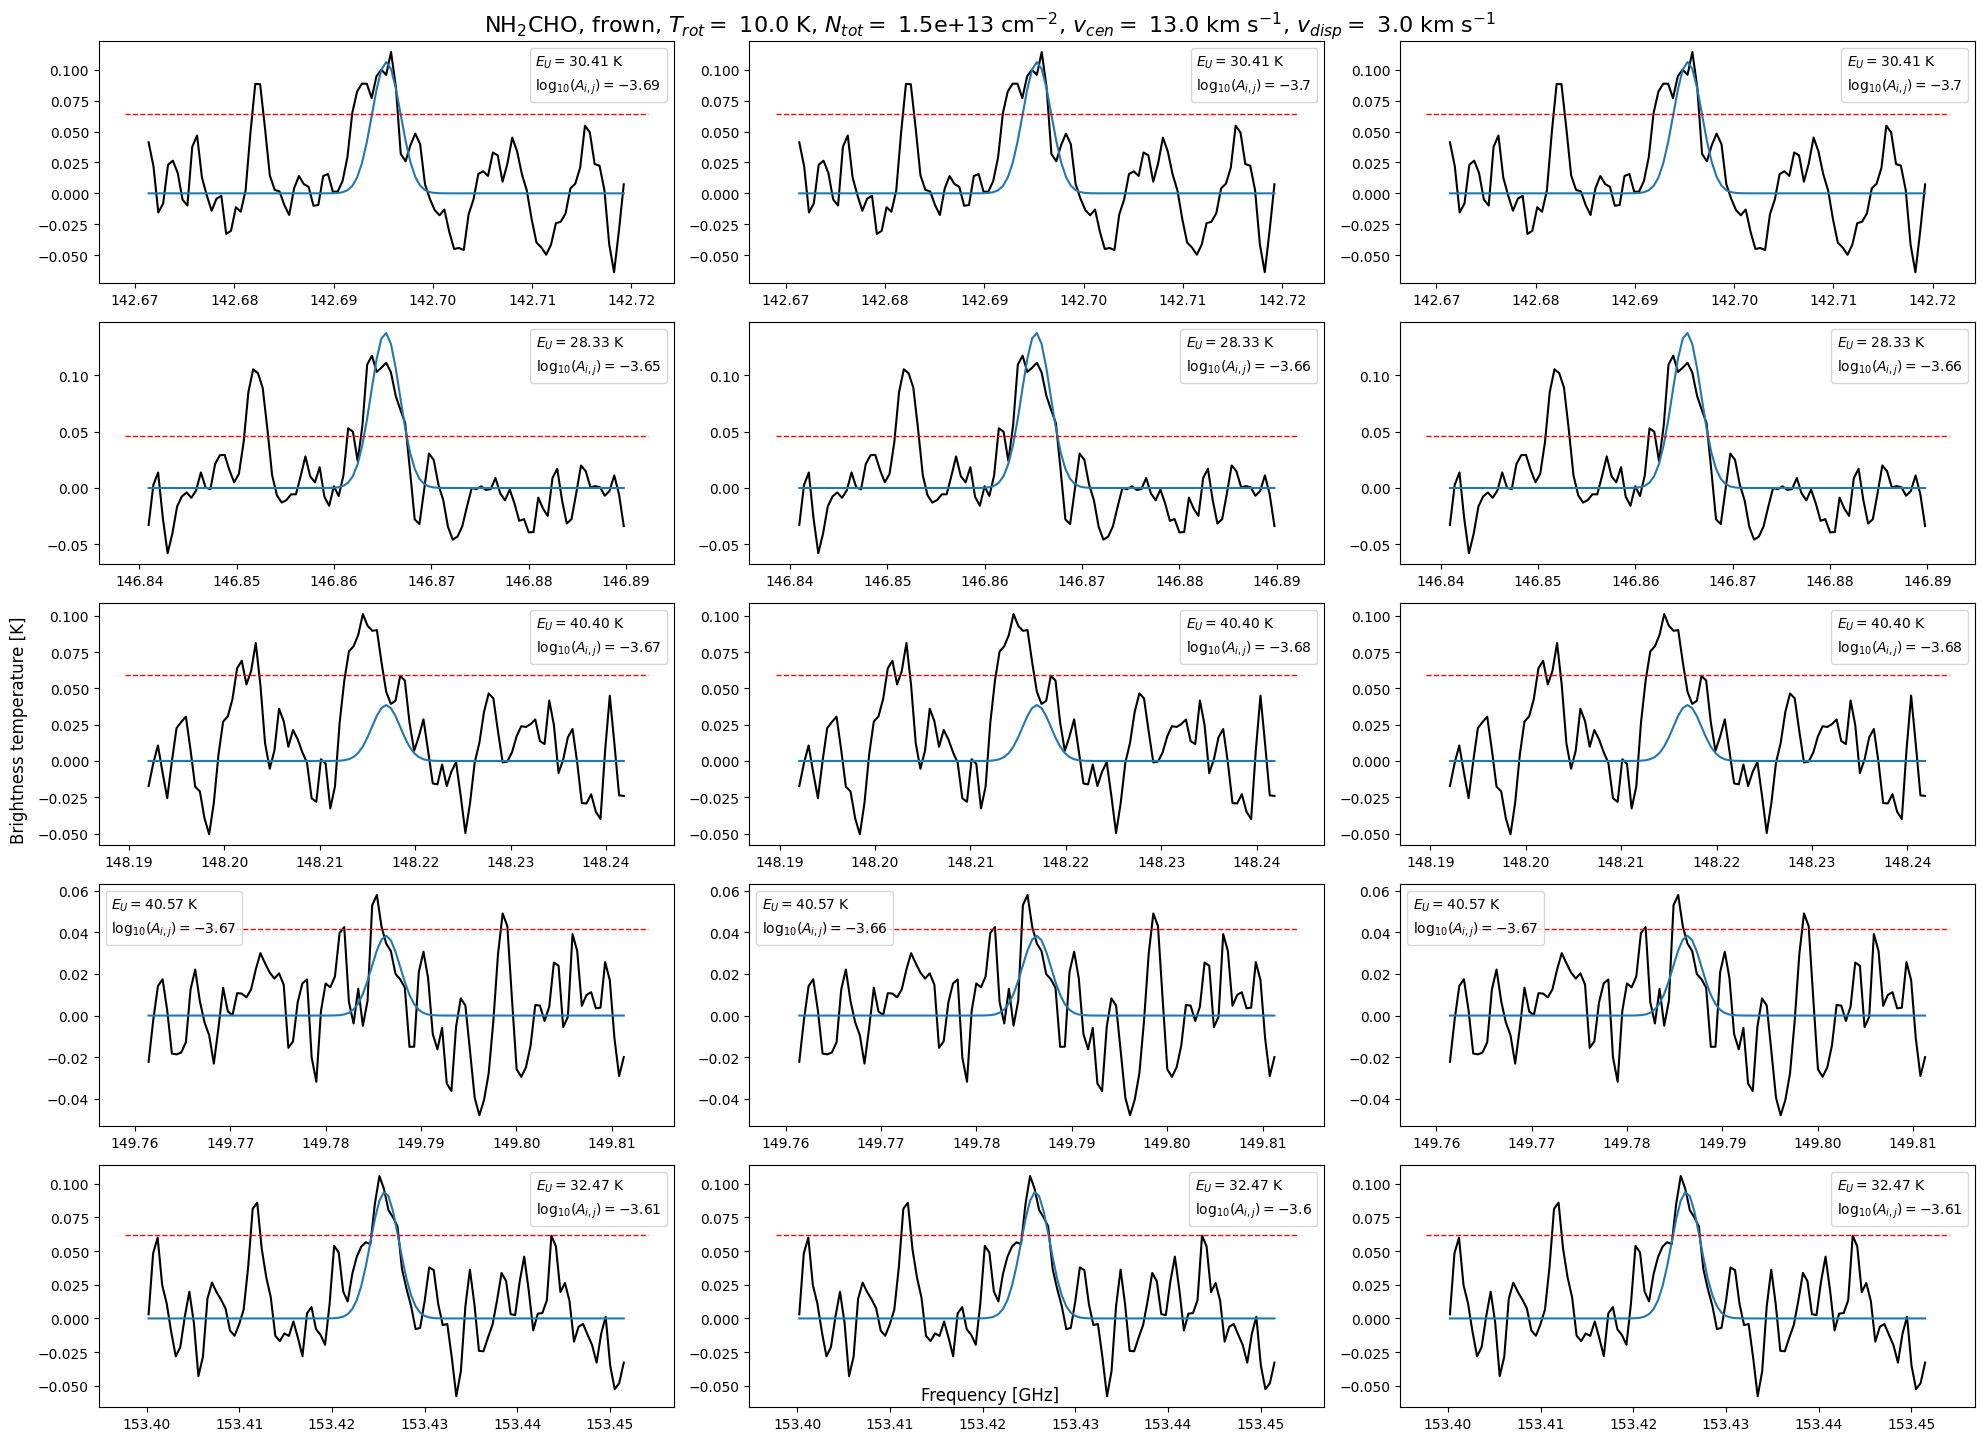

In [8]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes_masked, temp = 10., N_tot = 1.5e+13, v_cen = 13.*u.km/u.s, v_disp = 3.*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=15, 
               nrows=5, ncols=3, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'NH$_2$CHO', extr_type="reg", 
               just_data=False, EU_cutoff_K=50, aij_cutoff=-3.8, show_2_sigma=True)

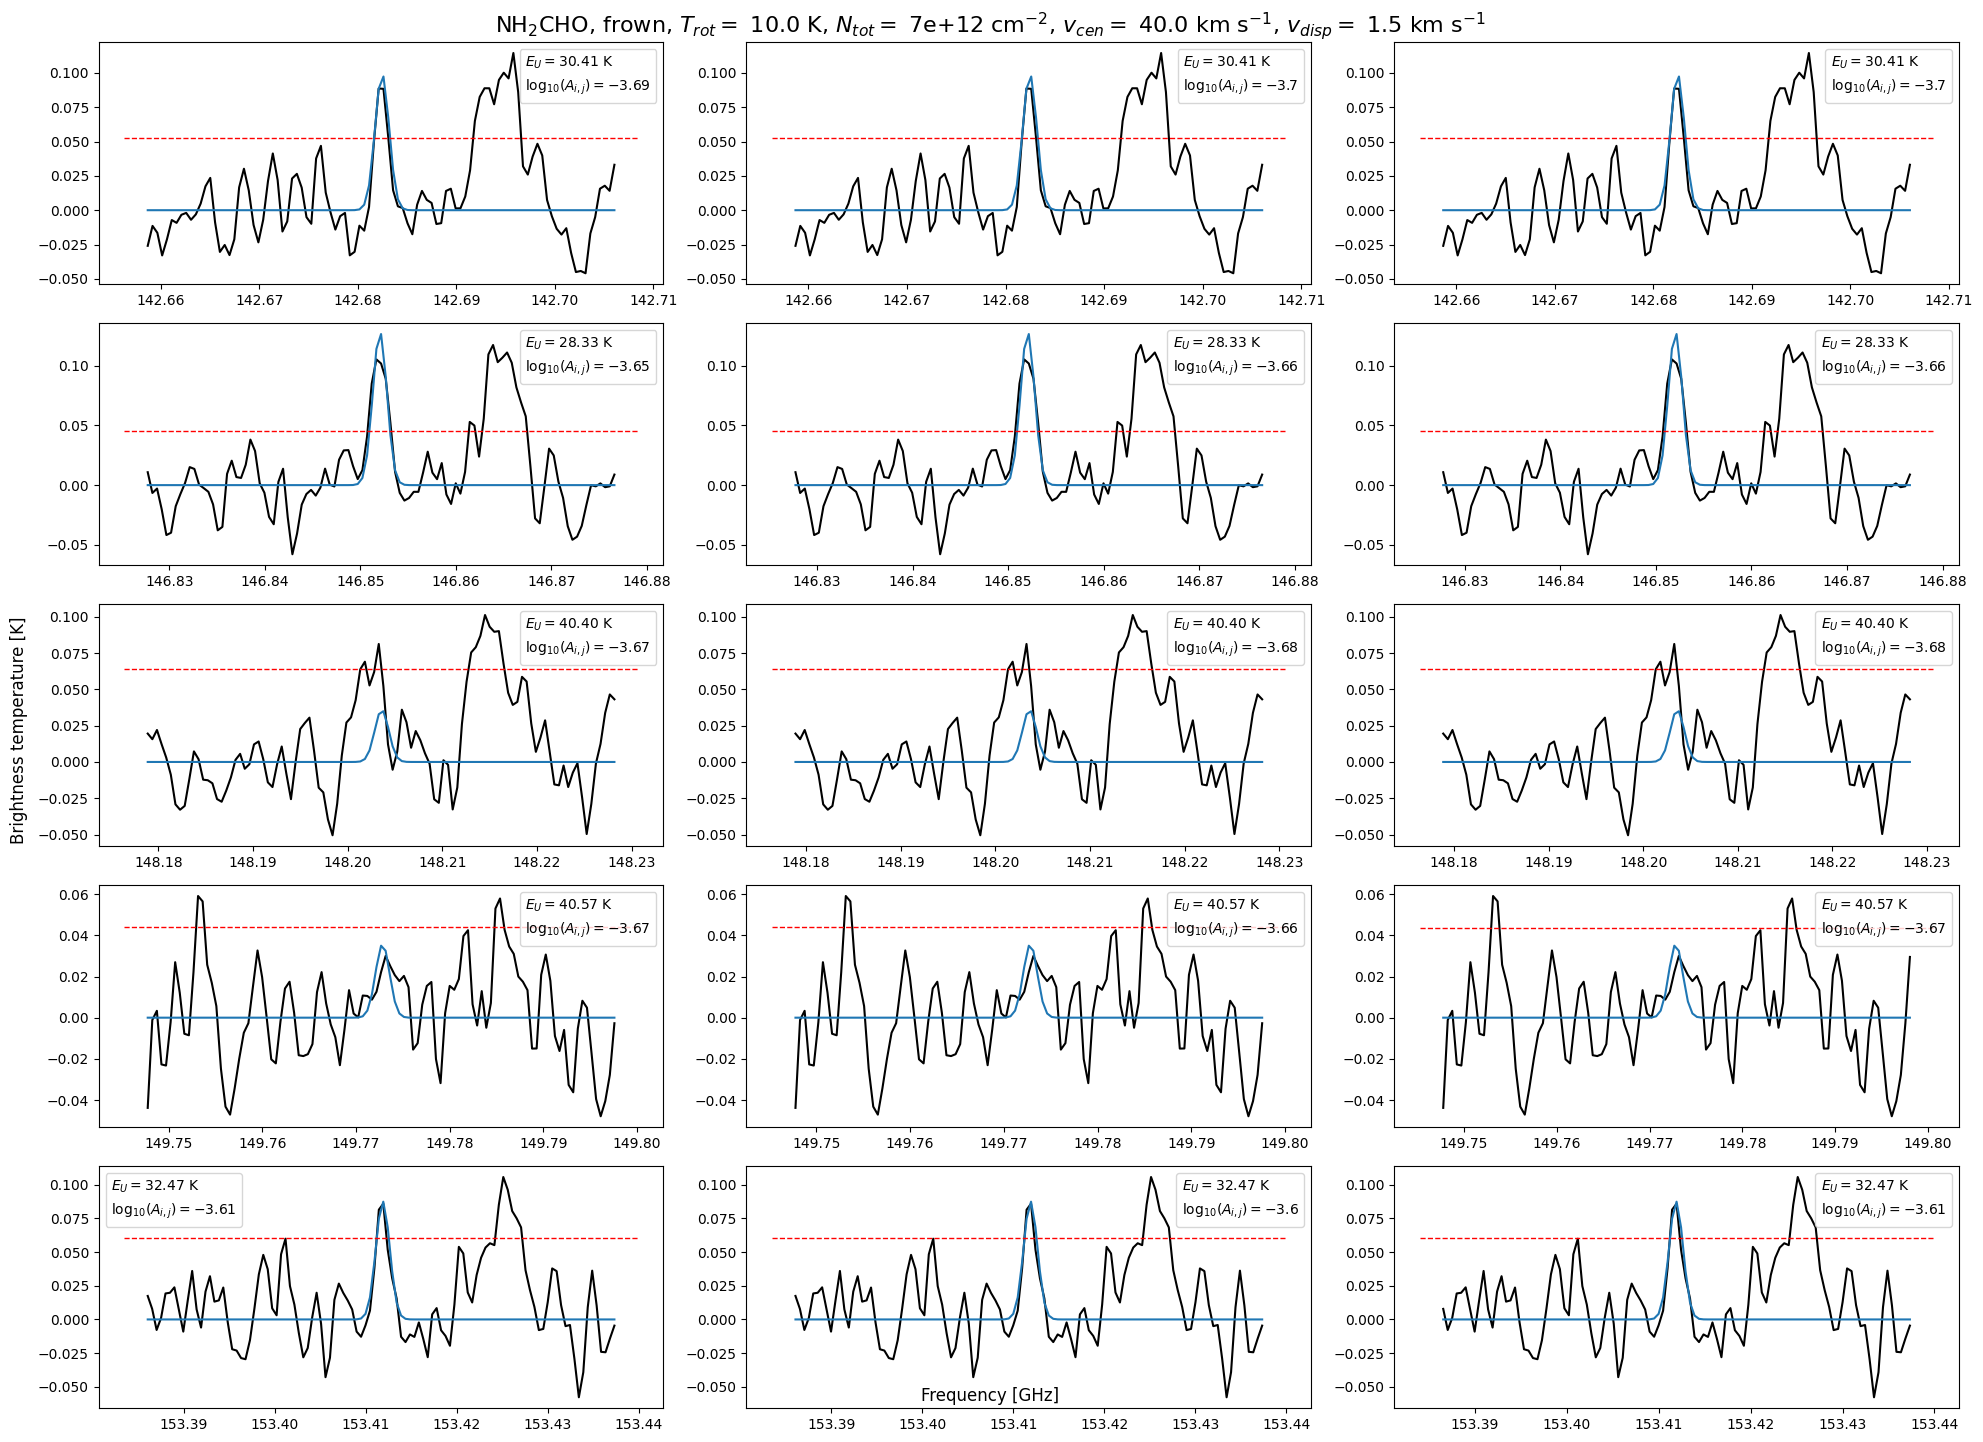

In [9]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 10., N_tot = 7.0e+12, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=15, 
                       nrows=5, ncols=3, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'NH$_2$CHO', extr_type="reg", 
                       just_data=False, EU_cutoff_K=50, aij_cutoff=-3.8, show_2_sigma=True, return_freqs=True)

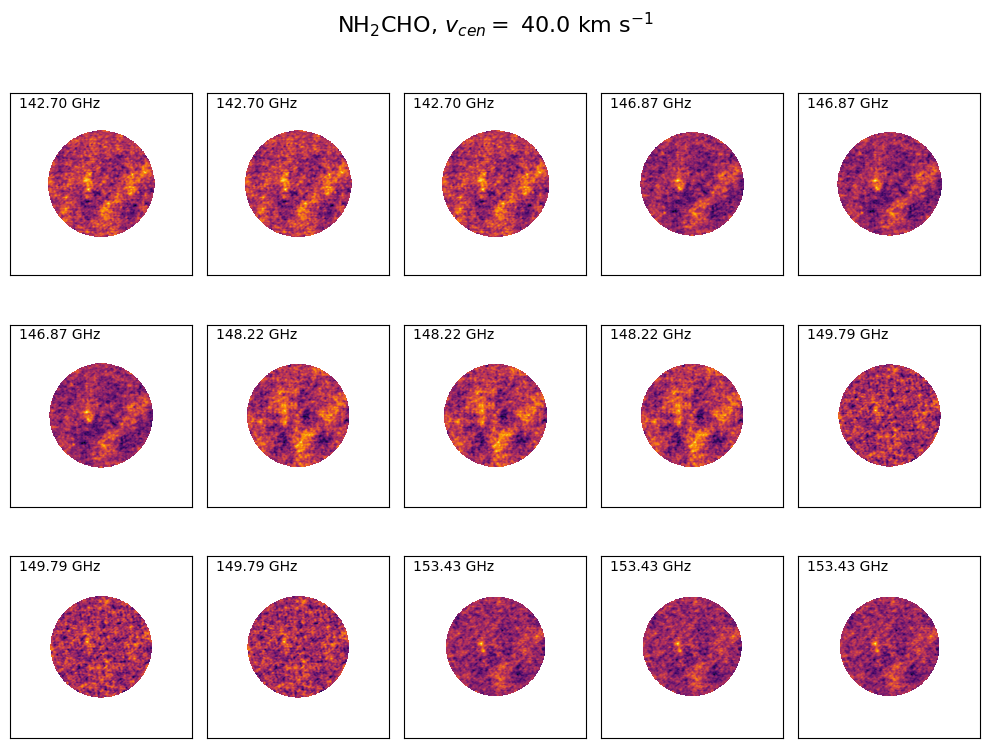

In [10]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40*u.km/u.s, fig_width=10, fig_height=8, nrows=3, ncols=5, name_for_plot=f'NH$_2$CHO')

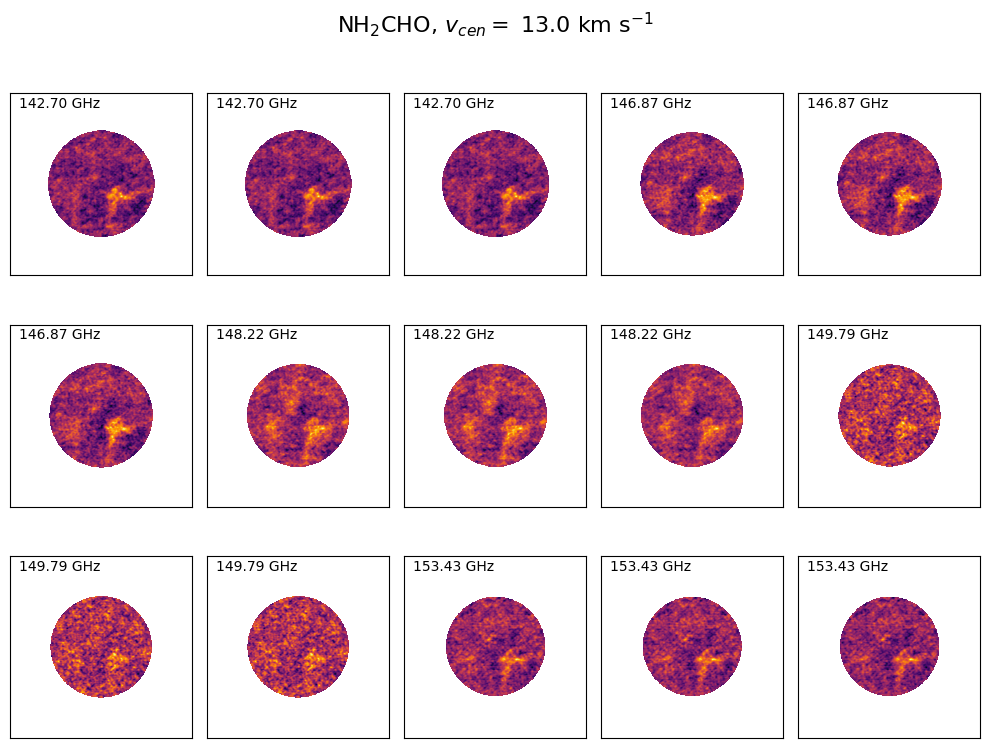

In [11]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=13*u.km/u.s, fig_width=10, fig_height=8, nrows=3, ncols=5, name_for_plot=f'NH$_2$CHO')